In [ ]:
import pandas as pd
import json
import requests
from io import BytesIO
import gzip


urls = {
    "All Beauty": "https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/All_Beauty.jsonl.gz",
    "Health & Personal Care": "https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Health_and_Personal_Care.jsonl.gz",
    "Video Games": "https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Video_Games.jsonl.gz"
}

all_reviews = []


def read_gzipped_jsonl(url, chunksize=50000):
    response = requests.get(url, stream=True)

    try:
        with gzip.GzipFile(fileobj=BytesIO(response.content)) as f:

            for chunk in pd.read_json(f, lines=True, chunksize=chunksize):
                yield chunk
    except Exception as e:
        print(f"Error reading gzip file: {e}")


def categorize_time_period(date):
    if date.year in [2018, 2019]:
        return "Pre-COVID"
    elif date.year in [2020, 2021]:
        return "During COVID"
    elif date.year in [2022, 2023]:
        return "Post-COVID"
    else:
        return "Unknown"


for category, url in urls.items():
    print(f"Processing {category}...")

    for chunk in read_gzipped_jsonl(url):

        chunk["timestamp"] = pd.to_datetime(chunk["timestamp"], unit='ms')


        chunk = chunk[["timestamp", "rating", "text", "helpful_vote"]]


        chunk["category"] = category


        chunk["time_period"] = chunk["timestamp"].apply(categorize_time_period)

        all_reviews.append(chunk)


all_reviews_df = pd.concat(all_reviews, ignore_index=True)


all_reviews_df.to_csv("filtered_reviews.csv", index=False)


print(all_reviews_df.head())



Processing All Beauty...


<ipython-input-94-c7a019e4a5e6>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["category"] = category
<ipython-input-94-c7a019e4a5e6>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["time_period"] = chunk["timestamp"].apply(categorize_time_period)
<ipython-input-94-c7a019e4a5e6>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Processing Health & Personal Care...


<ipython-input-94-c7a019e4a5e6>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["category"] = category
<ipython-input-94-c7a019e4a5e6>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["time_period"] = chunk["timestamp"].apply(categorize_time_period)
<ipython-input-94-c7a019e4a5e6>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Processing Video Games...


<ipython-input-94-c7a019e4a5e6>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["category"] = category
<ipython-input-94-c7a019e4a5e6>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["time_period"] = chunk["timestamp"].apply(categorize_time_period)
<ipython-input-94-c7a019e4a5e6>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

                timestamp  rating  \
0 2020-05-05 14:08:48.923       5   
1 2020-05-04 18:10:55.070       4   
2 2020-05-16 21:41:06.052       5   
3 2022-01-28 18:13:50.220       1   
4 2020-12-30 10:02:43.534       5   

                                                text  helpful_vote  \
0  This spray is really nice. It smells really go...             0   
1  This product does what I need it to do, I just...             1   
2                          Smells good, feels great!             2   
3                                     Felt synthetic             0   
4                                            Love it             0   

     category   time_period  
0  All Beauty  During COVID  
1  All Beauty  During COVID  
2  All Beauty  During COVID  
3  All Beauty    Post-COVID  
4  All Beauty  During COVID  


In [ ]:
nrows = all_reviews_df.shape[0]
print(nrows)

ncolumns = all_reviews_df.columns
print(ncolumns)

5820264
Index(['timestamp', 'rating', 'text', 'helpful_vote', 'category',
       'time_period'],
      dtype='object')


In [ ]:
all_reviews_df = all_reviews_df.query("time_period != 'Unknown'")
rating_stats = all_reviews_df.groupby('time_period')['rating'].agg(['mean', 'median', 'count']).reset_index()
rating_stats.columns = ['Time Period', 'Mean Rating', 'Median Rating', 'Review Count']
print(rating_stats)

    Time Period  Mean Rating  Median Rating  Review Count
0  During COVID     3.942934            5.0       1398526
1    Post-COVID     3.875300            5.0        710777
2     Pre-COVID     4.087609            5.0       1109374


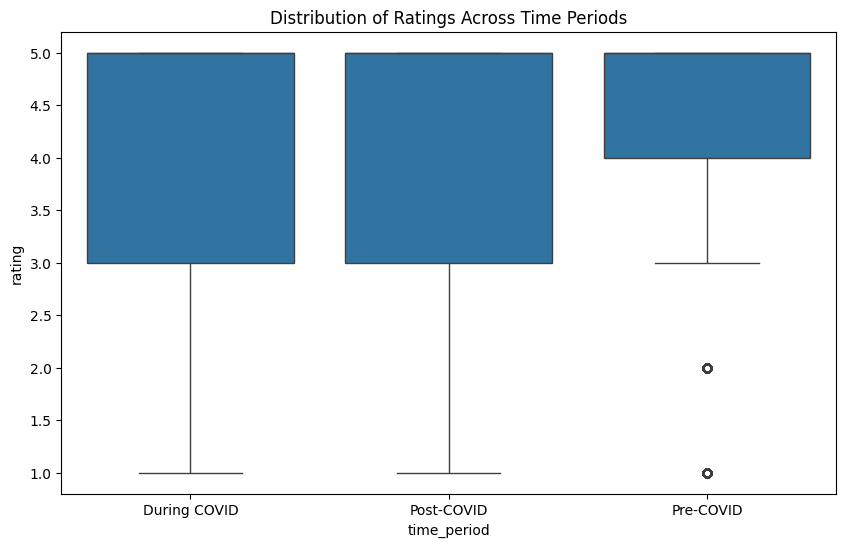

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,6))
sns.boxplot(data=all_reviews_df, x='time_period', y='rating')
plt.title("Distribution of Ratings Across Time Periods")
plt.show()


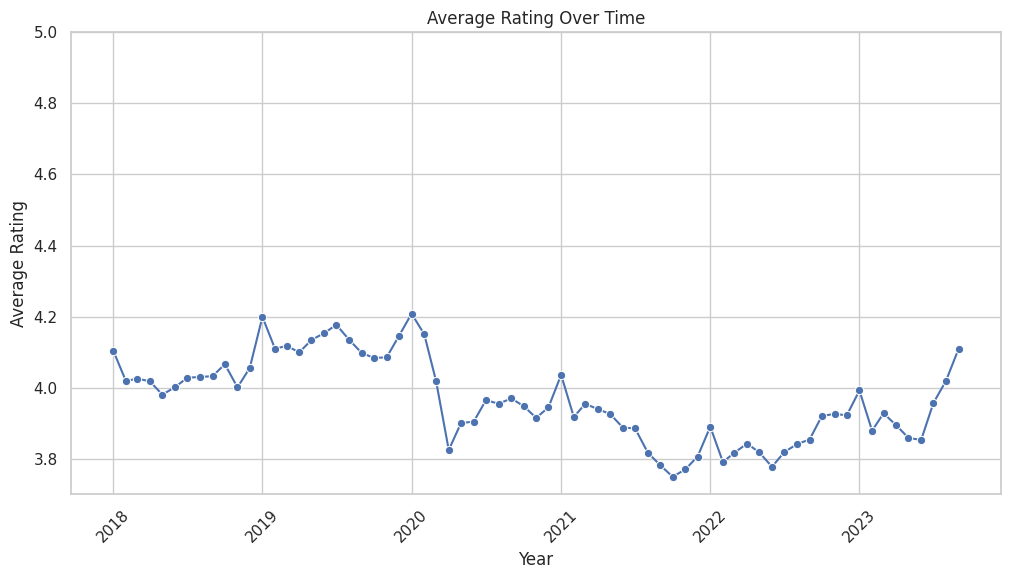

In [ ]:
sns.set(style="whitegrid")

all_reviews_df['month'] = all_reviews_df['timestamp'].dt.to_period('M')
monthly_avg_ratings = all_reviews_df.groupby('month')['rating'].mean().reset_index()
monthly_avg_ratings['month'] = monthly_avg_ratings['month'].dt.to_timestamp()


plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='rating', data=monthly_avg_ratings, marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.ylim(3.7, 5)

plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

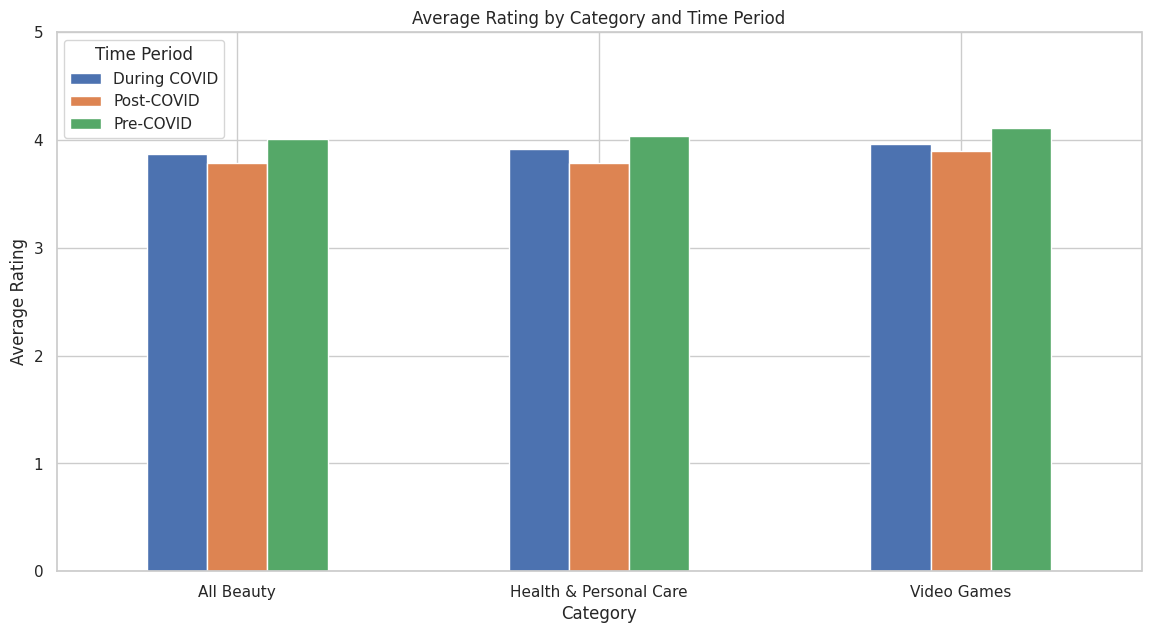

In [ ]:
category_ratings = all_reviews_df.groupby(['category', 'time_period'])['rating'].mean().unstack()

plt.figure(figsize=(12, 6))
category_ratings.plot(kind='bar', figsize=(14, 7))
plt.title('Average Rating by Category and Time Period')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.legend(title='Time Period')
plt.ylim(0, 5)
plt.show()

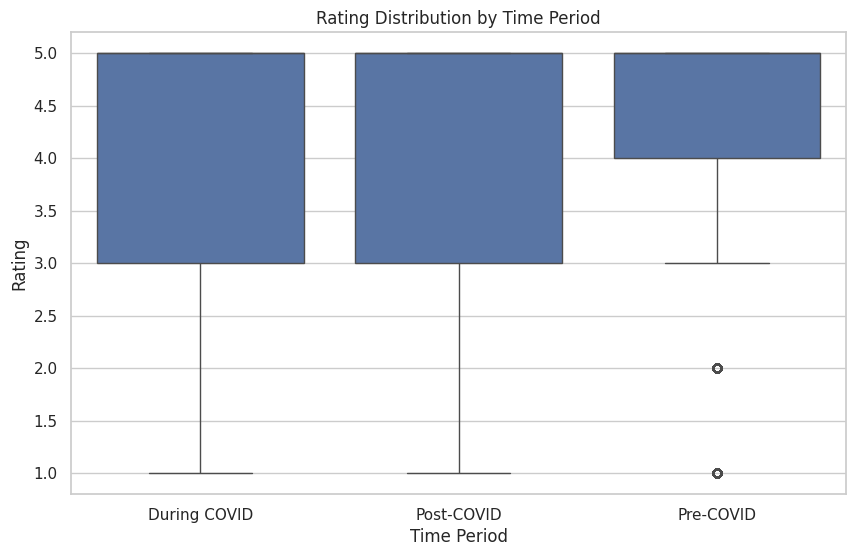

In [ ]:
# Plot box plots for each time period
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_period', y='rating', data=all_reviews_df)
plt.title('Rating Distribution by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Rating')
plt.show()

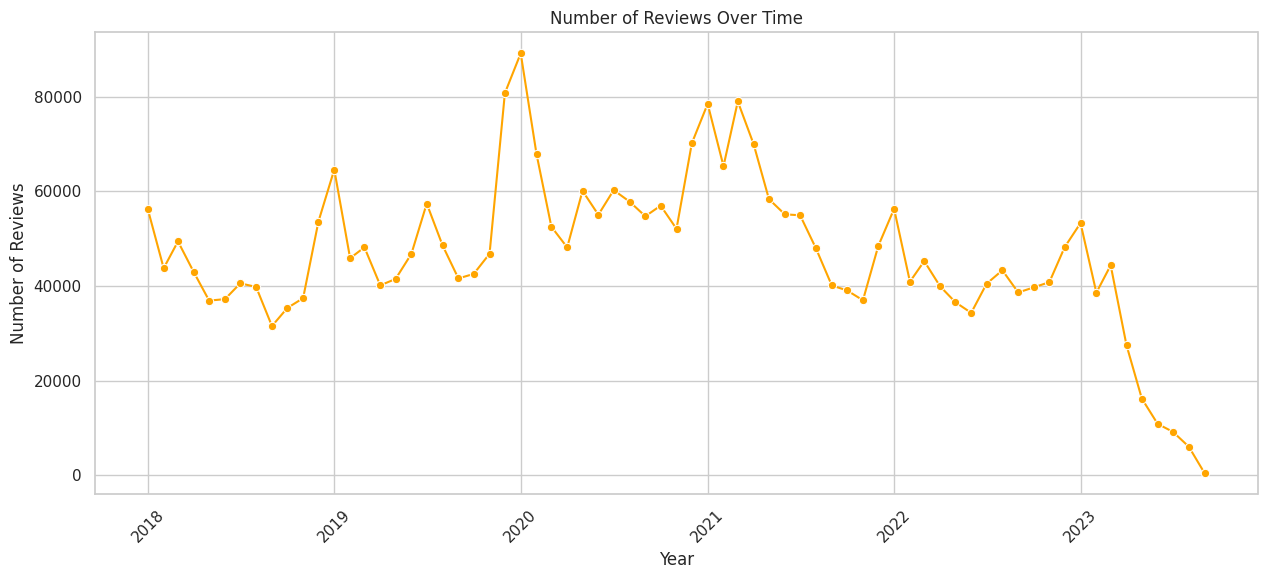

In [ ]:
monthly_review_counts = all_reviews_df.groupby('month').size().reset_index(name='review_count')
monthly_review_counts['month'] = monthly_review_counts['month'].dt.to_timestamp()

plt.figure(figsize=(15, 6))
sns.lineplot(x='month', y='review_count', data=monthly_review_counts, marker='o', color='orange')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

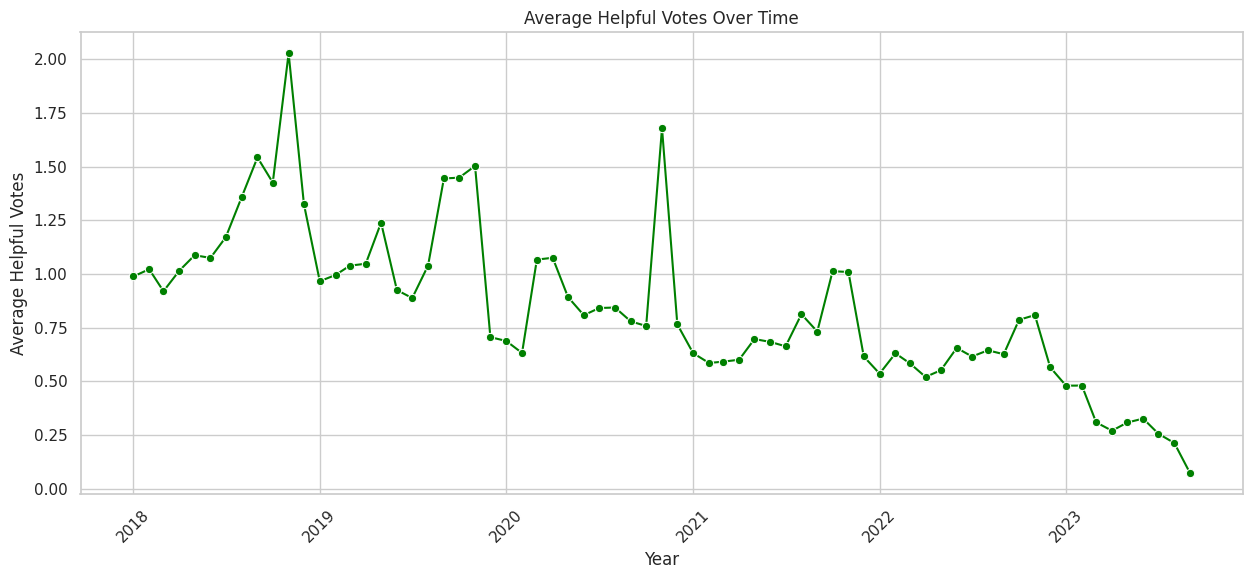

In [ ]:

monthly_helpful_votes = all_reviews_df.groupby('month')['helpful_vote'].mean().reset_index()
monthly_helpful_votes['month'] = monthly_helpful_votes['month'].dt.to_timestamp()


plt.figure(figsize=(15, 6))
sns.lineplot(x='month', y='helpful_vote', data=monthly_helpful_votes, marker='o', color='green')
plt.title('Average Helpful Votes Over Time')
plt.xlabel('Year')
plt.ylabel('Average Helpful Votes')
plt.xticks(rotation=45)
plt.show()

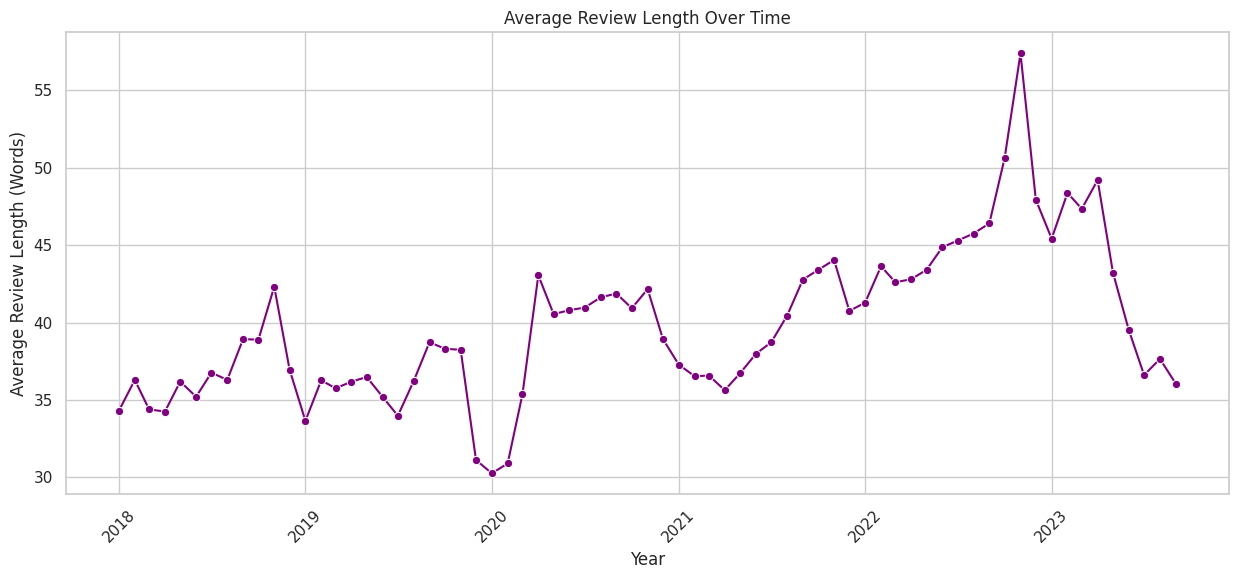

In [ ]:

all_reviews_df['review_length'] = all_reviews_df['text'].apply(lambda x: len(str(x).split()))


monthly_review_length = all_reviews_df.groupby('month')['review_length'].mean().reset_index()
monthly_review_length['month'] = monthly_review_length['month'].dt.to_timestamp()


plt.figure(figsize=(15, 6))
sns.lineplot(x='month', y='review_length', data=monthly_review_length, marker='o', color='purple')
plt.title('Average Review Length Over Time')
plt.xlabel('Year')
plt.ylabel('Average Review Length (Words)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x600 with 0 Axes>

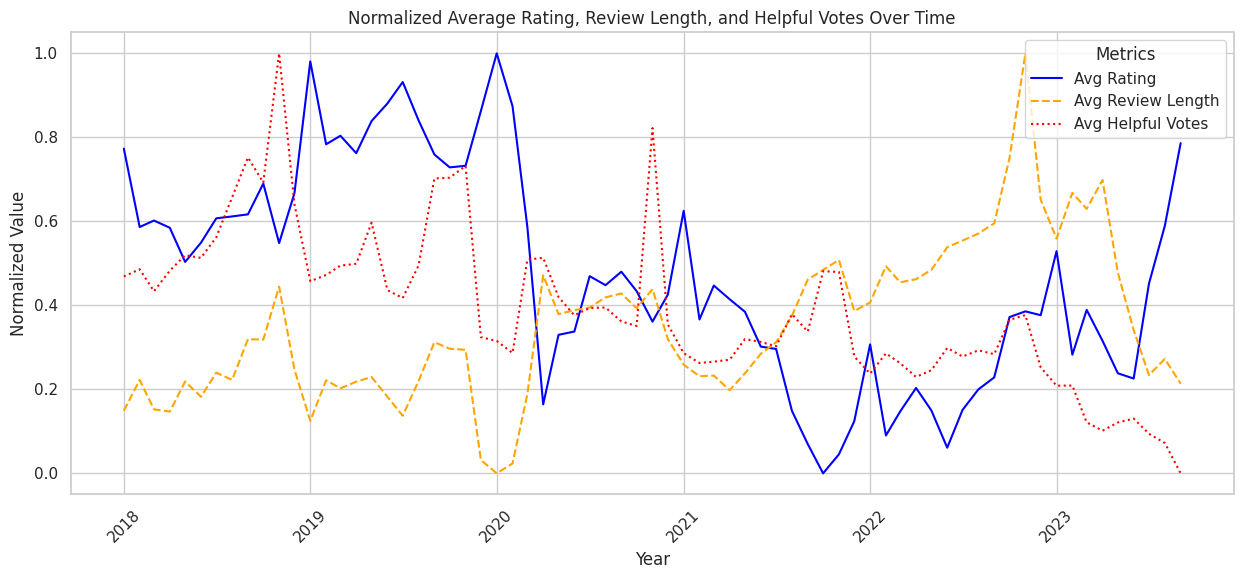

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set(style="whitegrid")


plt.figure(figsize=(15, 6))

monthly_avg_ratings['rating_normalized'] = (monthly_avg_ratings['rating'] - monthly_avg_ratings['rating'].min()) / (monthly_avg_ratings['rating'].max() - monthly_avg_ratings['rating'].min())
monthly_review_length['review_length_normalized'] = (monthly_review_length['review_length'] - monthly_review_length['review_length'].min()) / (monthly_review_length['review_length'].max() - monthly_review_length['review_length'].min())
monthly_helpful_votes['helpful_vote_normalized'] = (monthly_helpful_votes['helpful_vote'] - monthly_helpful_votes['helpful_vote'].min()) / (monthly_helpful_votes['helpful_vote'].max() - monthly_helpful_votes['helpful_vote'].min())

plt.figure(figsize=(15, 6))

sns.lineplot(x='month', y='rating_normalized', data=monthly_avg_ratings, label='Avg Rating', color='blue')
sns.lineplot(x='month', y='review_length_normalized', data=monthly_review_length, label='Avg Review Length', color='orange', linestyle='--')
sns.lineplot(x='month', y='helpful_vote_normalized', data=monthly_helpful_votes, label='Avg Helpful Votes', color='red', linestyle=':')


plt.title('Normalized Average Rating, Review Length, and Helpful Votes Over Time')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')


plt.show()

In [ ]:
import scipy.stats as stats
pre_pandemic_df = all_reviews_df[all_reviews_df['time_period'] == 'Pre-COVID']['rating']
pandemic_df = all_reviews_df[all_reviews_df['time_period'] == 'During COVID']['rating']
post_pandemic_df = all_reviews_df[all_reviews_df['time_period'] == 'Post-COVID']['rating']


f_statistic, p_value = stats.f_oneway(pre_pandemic_df, pandemic_df, post_pandemic_df)

print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Result indicates there is a statistialy significant difference in the mean ratings
# across the three time periods

ANOVA Results:
F-statistic: 4976.1759475959125
P-value: 0.0


In [ ]:
# Pairwise t-tests
t_stat1, p_value1 = stats.ttest_ind(pre_pandemic_df, pandemic_df)
t_stat2, p_value2 = stats.ttest_ind(pandemic_df, post_pandemic_df)
t_stat3, p_value3 = stats.ttest_ind(pre_pandemic_df, post_pandemic_df)

print(f"Pre-COVID vs. During COVID: t-statistic={t_stat1}, p-value={p_value1}")
print(f"During COVID vs. Post-COVID: t-statistic={t_stat2}, p-value={p_value2}")
print(f"Pre-COVID vs. Post-COVID: t-statistic={t_stat3}, p-value={p_value3}")



Pre-COVID vs. During COVID: t-statistic=76.30411436746851, p-value=0.0
During COVID vs. Post-COVID: t-statistic=30.172549642257284, p-value=5.990901390393306e-200
Pre-COVID vs. Post-COVID: t-statistic=94.14664779634704, p-value=0.0


In [ ]:
stattest = {
    "Test": ["ANOVA", "Pairwise t-test", "Pairwise t-test", "Pairwise t-test"],
    "Comparison": ["Pre-COVID, During COVID, Post-COVID",
                   "Pre-COVID vs. During COVID",
                   "During COVID vs. Post-COVID",
                   "Pre-COVID vs. Post-COVID"],
    "t-statistic": [f_statistic, t_stat1, t_stat2, t_stat3],
    "p-value": [p_value, p_value1, p_value2, p_value3]
}


statdf = pd.DataFrame(stattest)


styled_df = statdf.style.set_table_attributes('class="table table-striped"')
styled_df.set_caption("Statistical Analysis Results")
styled_df = statdf.style.format({
    't-statistic': '{:.3f}',
    'p-value': '{:.3f}'
})

styled_df

,Test,Comparison,t-statistic,p-value
0,ANOVA,"Pre-COVID, During COVID, Post-COVID",4976.176,0.000
1,Pairwise t-test,Pre-COVID vs. During COVID,76.304,0.000
2,Pairwise t-test,During COVID vs. Post-COVID,30.173,0.000
3,Pairwise t-test,Pre-COVID vs. Post-COVID,94.147,0.000


# RQ2 - data processing

In [18]:
from scipy.stats import ttest_ind


results = []


all_beauty = all_reviews_df[all_reviews_df['category'] == "All Beauty"]

pre_covid = all_beauty[all_beauty['time_period'] == "Pre-COVID"]['rating']
during_covid = all_beauty[all_beauty['time_period'] == "During COVID"]['rating']

t_stat, p_val = ttest_ind(pre_covid, during_covid, equal_var=False)
print(f"All Beauty: t = {t_stat:.2f}, p = {p_val:.4f}")

results.append(["All Beauty", t_stat, p_val])


health_pc = all_reviews_df[all_reviews_df['category'] == "Health & Personal Care"]

pre_covid = health_pc[health_pc['time_period'] == "Pre-COVID"]['rating']
during_covid = health_pc[health_pc['time_period'] == "During COVID"]['rating']

t_stat, p_val = ttest_ind(pre_covid, during_covid, equal_var=False)
print(f"Health and Personal Care : t = {t_stat:.2f}, p = {p_val:.4f}")

results.append(["Health & Personal Care", t_stat, p_val])


video_games = all_reviews_df[all_reviews_df['category'] == "Video Games"]

pre_covid = video_games[video_games['time_period'] == "Pre-COVID"]['rating']
during_covid = video_games[video_games['time_period'] == "During COVID"]['rating']

t_stat, p_val = ttest_ind(pre_covid, during_covid, equal_var=False)
print(f"Video Games: t = {t_stat:.2f}, p = {p_val:.4f}")

results.append(["Video Games", t_stat, p_val])

All Beauty: t = 29.64, p = 0.0000
Health and Personal Care : t = 19.66, p = 0.0000
Video Games: t = 66.68, p = 0.0000


In [ ]:

df_results = pd.DataFrame(results, columns=["Category", "t-statistic", "p-value"])

styled_df = df_results.style.set_table_attributes('class="table table-striped"')
styled_df.set_caption("T-test Results")
styled_df = df_results.style.format({
    't-statistic': '{:.3f}',
    'p-value': '{:.3f}'
})

styled_df

,Category,t-statistic,p-value
0,All Beauty,29.643,0.000
1,Health & Personal Care,19.660,0.000
2,Video Games,66.678,0.000


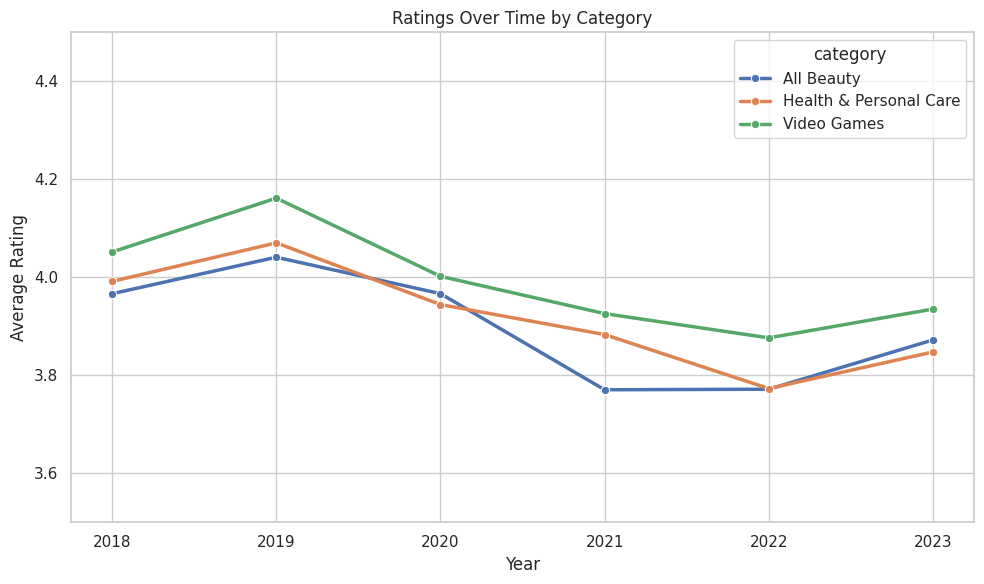

In [ ]:
top_3 = ['All Beauty', 'Health & Personal Care', 'Video Games']
filtered_df = all_reviews_df[all_reviews_df['category'].isin(top_3)]
filtered_df['year'] = pd.to_datetime(filtered_df['month'].dt.to_timestamp()).dt.year


category_avg = filtered_df.groupby(['category', 'year'])['rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=category_avg, x='year', y='rating', hue='category', marker='o', linewidth=2.5)
plt.ylim(3.5, 4.5)
plt.title("Ratings Over Time by Category")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()




<ipython-input-84-5157fcb1d4fa>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
<ipython-input-84-5157fcb1d4fa>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
<ipython-input-84-5157fcb1d4fa>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


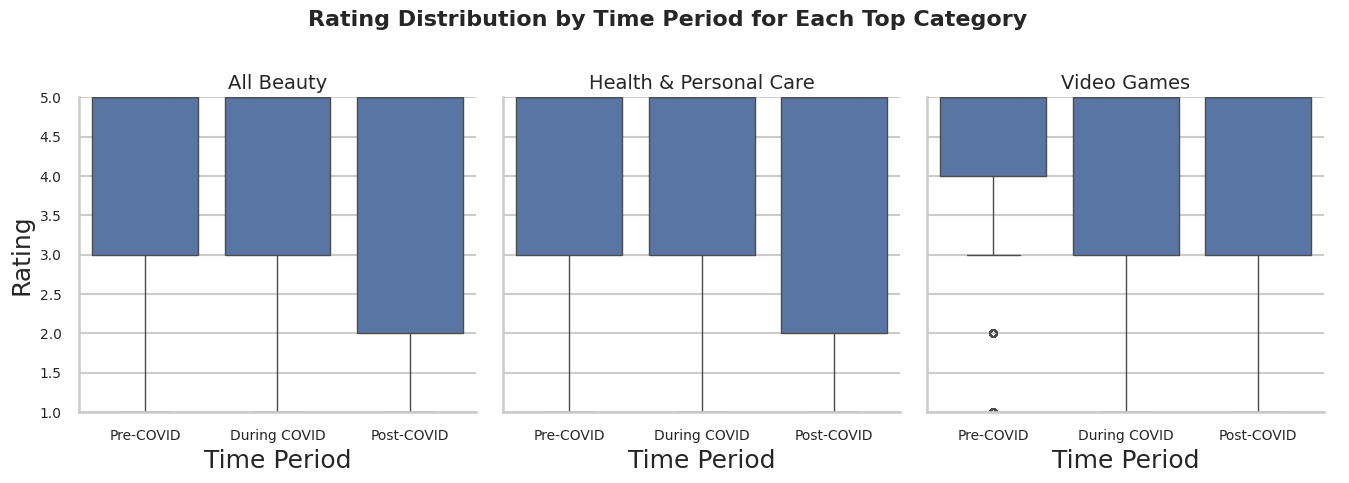

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_categories = ['All Beauty', 'Health & Personal Care', 'Video Games']
filtered_df = all_reviews_df[all_reviews_df['category'].isin(top_categories)].copy()


ordered_periods = ["Pre-COVID", "During COVID", "Post-COVID"]
filtered_df['time_period'] = pd.Categorical(filtered_df['time_period'], categories=ordered_periods, ordered=True)


sns.set(style="whitegrid", context="talk")
g = sns.catplot(
    data=filtered_df,
    x='time_period',
    y='rating',
    col='category',
    kind='box',
    col_order=top_categories,
    col_wrap=3,
    height=5,
    aspect=0.9,
    sharey=True
)


g.set_titles("{col_name}", size=14)
g.set(ylim=(1, 5))
g.set_axis_labels("Time Period", "Rating")
for ax in g.axes.flat:
    ax.tick_params(labelsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Rating Distribution by Time Period for Each Top Category", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()




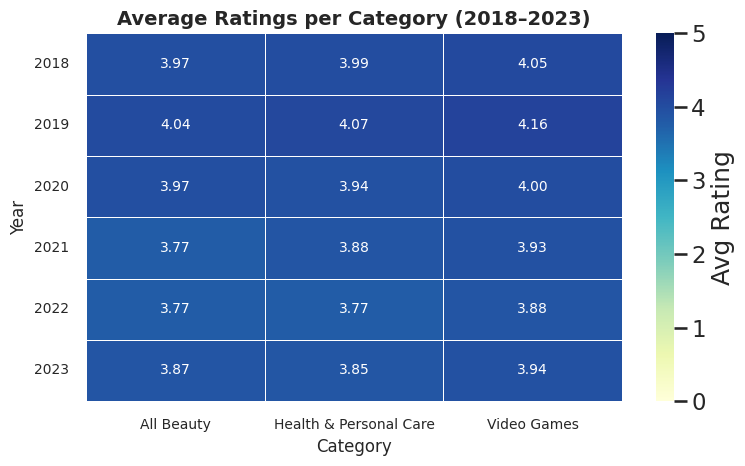

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


all_reviews_df['timestamp'] = pd.to_datetime(all_reviews_df['timestamp'], errors='coerce')


all_reviews_df = all_reviews_df.dropna(subset=['timestamp', 'rating'])


all_reviews_df['year'] = all_reviews_df['timestamp'].dt.year


filtered_df = all_reviews_df[all_reviews_df['year'].between(2018, 2023)]


top_categories = ["All Beauty", "Health & Personal Care", "Video Games"]
filtered_df = filtered_df[filtered_df['category'].isin(top_categories)]

heatmap_data = (
    filtered_df.groupby(['year', 'category'])['rating']
    .mean()
    .unstack()
    .round(2)
)


heatmap_data = heatmap_data[top_categories]


plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    vmin=0,
    vmax=5,
    linewidths=0.5,
    annot_kws={"size": 10},
    cbar_kws={'label': 'Avg Rating'}
)

plt.title("Average Ratings per Category (2018–2023)", fontsize=14, weight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()




RQ3

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd

sns.set(style="whitegrid", context="talk")

top_categories = ['All Beauty', 'Health & Personal Care', 'Video Games']
all_reviews_df = all_reviews_df[all_reviews_df['category'].isin(top_categories)].copy()

ordered_periods = ["Pre-COVID", "During COVID", "Post-COVID"]
all_reviews_df['time_period'] = pd.Categorical(all_reviews_df['time_period'], categories=ordered_periods, ordered=True)
all_reviews_df['review_length'] = all_reviews_df['text'].apply(lambda x: len(str(x).split()))




<ipython-input-87-4cf90dde5067>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_avg = all_reviews_df.groupby(['category', 'time_period'])['rating'].mean().reset_index()


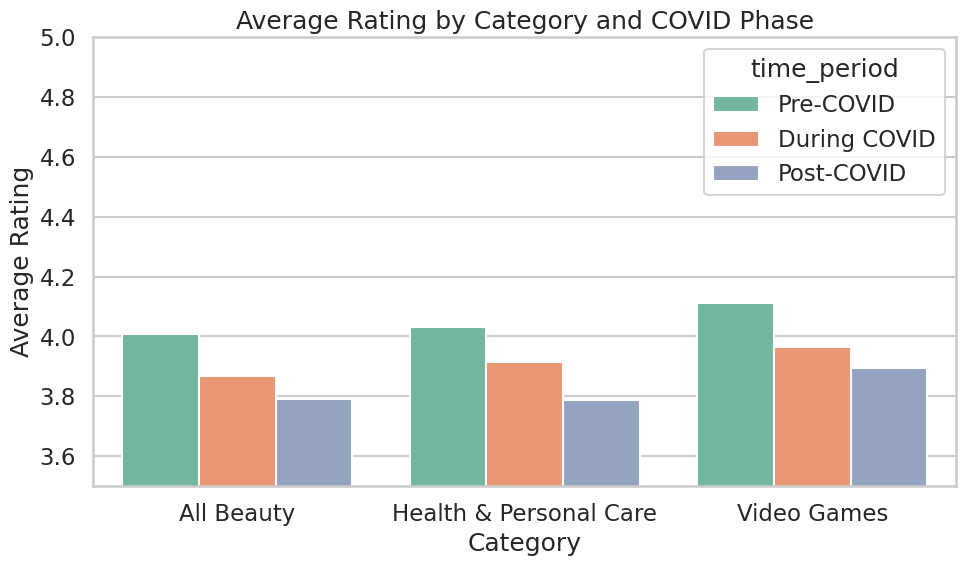

In [ ]:
period_avg = all_reviews_df.groupby(['category', 'time_period'])['rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=period_avg, x='category', y='rating', hue='time_period', palette='Set2')
plt.ylim(3.5, 5)
plt.title("Average Rating by Category and COVID Phase")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


<ipython-input-88-15312b591311>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories, y=t_stats, palette='coolwarm')


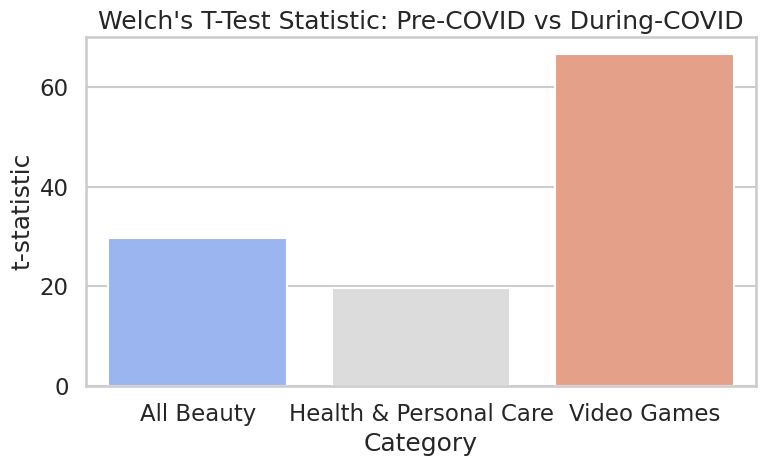

In [ ]:
from scipy.stats import ttest_ind

t_stats = []
p_values = []

for cat in top_categories:
    cat_df = all_reviews_df[all_reviews_df['category'] == cat]
    pre = cat_df[cat_df['time_period'] == 'Pre-COVID']['rating']
    during = cat_df[cat_df['time_period'] == 'During COVID']['rating']

    t_stat, p_val = ttest_ind(pre, during, equal_var=False)
    t_stats.append(t_stat)
    p_values.append(p_val)


plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories, y=t_stats, palette='coolwarm')
plt.title("Welch's T-Test Statistic: Pre-COVID vs During-COVID")
plt.ylabel("t-statistic")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm


X = all_reviews_df[['review_length']]
X = sm.add_constant(X)
y = all_reviews_df['rating']


model_length = sm.OLS(y, X).fit()
print("Regression: Rating ~ Review Length")
print(model_length.summary())



Regression: Rating ~ Review Length
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                 2.616e+04
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:17:21   Log-Likelihood:            -5.8750e+06
No. Observations:             3218677   AIC:                         1.175e+07
Df Residuals:                 3218675   BIC:                         1.175e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const      

In [ ]:

X2 = all_reviews_df[['helpful_vote']]
X2 = sm.add_constant(X2)
y2 = all_reviews_df['rating']


model_helpful = sm.OLS(y2, X2).fit()
print("\nRegression: Rating ~ Helpfulness")
print(model_helpful.summary())




Regression: Rating ~ Helpfulness
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1269.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):          6.47e-278
Time:                        02:17:35   Log-Likelihood:            -5.8874e+06
No. Observations:             3218677   AIC:                         1.177e+07
Df Residuals:                 3218675   BIC:                         1.177e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         

In [ ]:

length_coef = model_length.params['review_length']
length_pval = model_length.pvalues['review_length']
length_r2 = model_length.rsquared

helpful_coef = model_helpful.params['helpful_vote']
helpful_pval = model_helpful.pvalues['helpful_vote']
helpful_r2 = model_helpful.rsquared


summary_df = pd.DataFrame({
    'Feature': ['Review Length', 'Helpful Votes'],
    'Coefficient': [length_coef, helpful_coef],
    'p-value': [length_pval, helpful_pval],
    'R²': [length_r2, helpful_r2]
})

print("\nRegression Summary:")
print(summary_df.round(4))




Regression Summary:
         Feature  Coefficient  p-value      R²
0  Review Length      -0.0020      0.0  0.0081
1  Helpful Votes      -0.0023      0.0  0.0004
